In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [5]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict




## 1. Likelihood methods and identifiability 


### 1.1 $\mathcal{L}(\hat{\theta})$ plots


When we do parameter estimation using either (a) Nested sampling (c.f. Bilby) or (b) expectation maximisation we want to try to maximise the likelihood.

When we run the Kalman filter for a particular set of parameters it returns a likelihood $\mathcal{L}(\hat{\theta}) = \text{KF}(\hat{\theta})$ 

For each of our parameters, what does the $\mathcal{L}(\hat{\theta})$ curve look like (holding other parameters constant)?

Optimal likelihood is:  -35092.388387753206
0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 0.01
7 f00 327.8470205611185
8 fdot0 -1.227834e-15
9 gamma0 1e-13
10 distance0 181816860005.41092


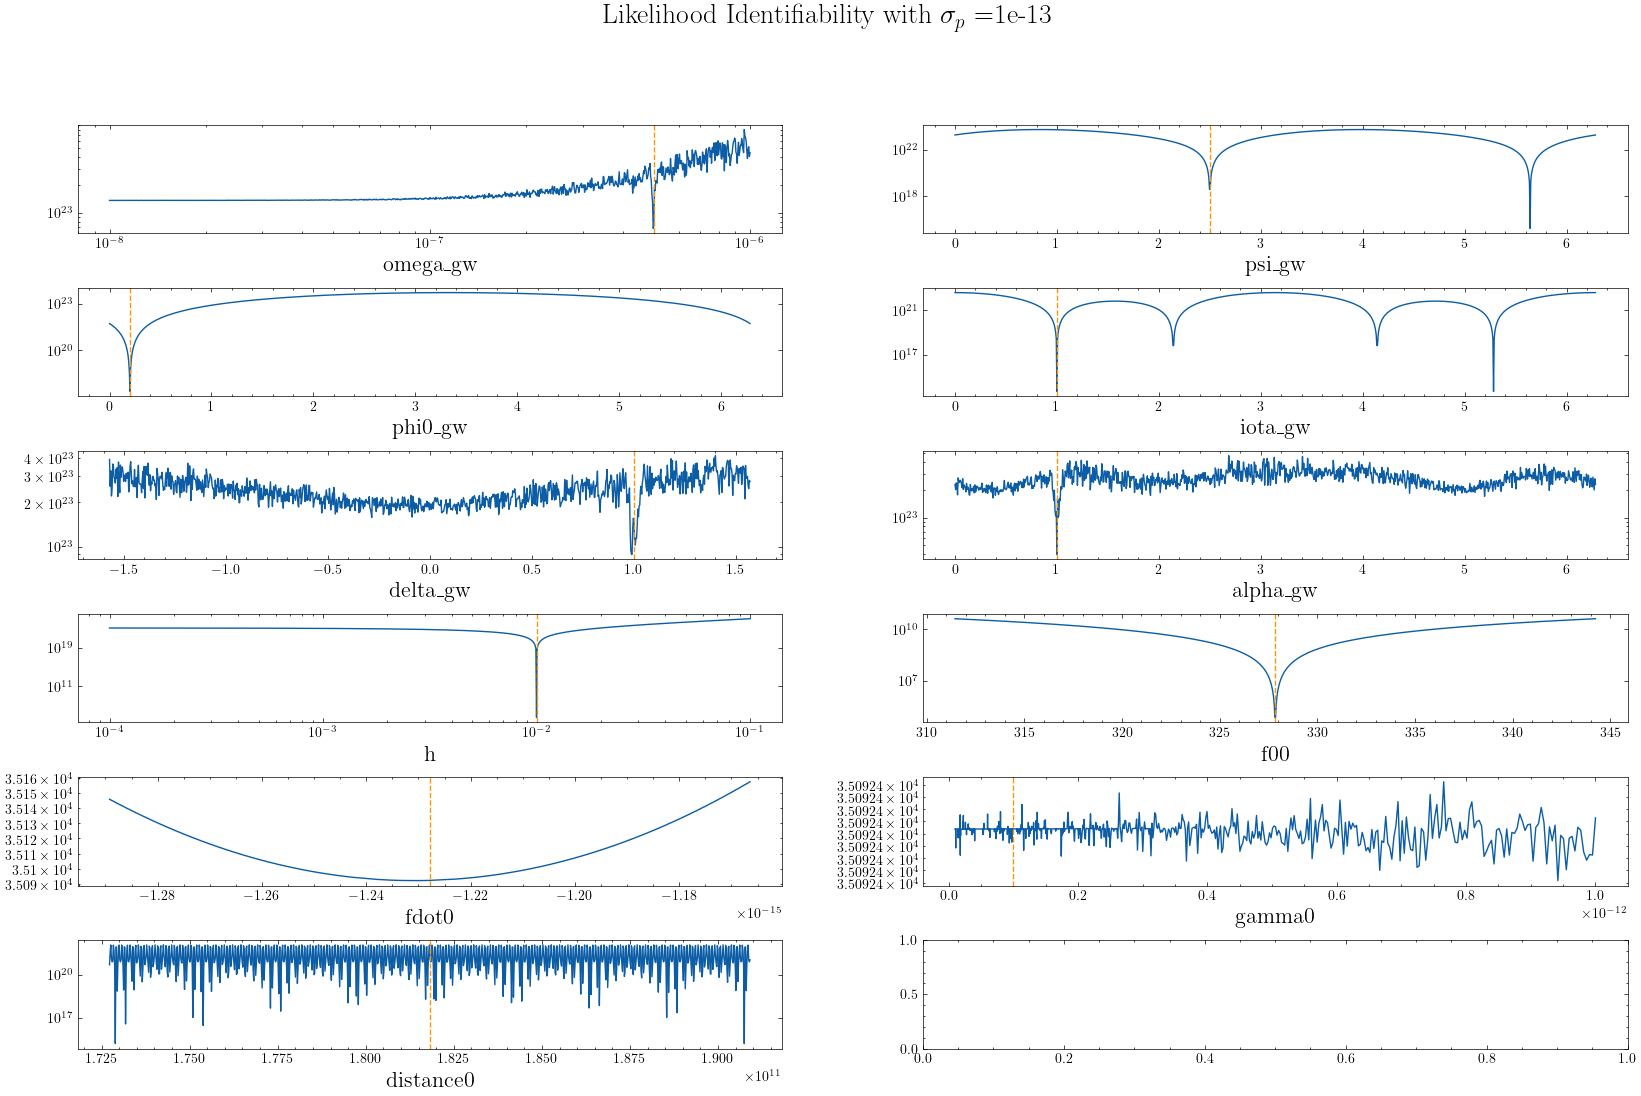

In [443]:
from plotting import likelihoods_over_priors
import numpy as np 


P   = SystemParameters()   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Optimal likelihood is: ", model_likelihood)



selected_parameters = ["omega_gw","psi_gw","phi0_gw","iota_gw","delta_gw","alpha_gw","h","f00","fdot0","gamma0","distance0"]
parameters_dict = {k: true_parameters[k] for k in selected_parameters}


nsamples = int(1e3)
priors = [np.logspace(-8,-6,nsamples),    #omega
          np.linspace(0,2*np.pi,nsamples),#psi
          np.linspace(0,2*np.pi,nsamples),#phi0
          np.linspace(0,2*np.pi,nsamples), #iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),        #delta
          np.linspace(0,2*np.pi,nsamples),#alpha
          np.logspace(-4,-1,nsamples), #h
          np.linspace(true_parameters["f00"]*0.95,true_parameters["f00"]*1.05, nsamples), #f0
          np.linspace(true_parameters["fdot0"]*1.05,true_parameters["fdot0"]*0.95, nsamples), #fdot0
          np.logspace(-12,-14,nsamples), #gamma0
          np.linspace(true_parameters["distance0"]*0.95,true_parameters["distance0"]*1.05, nsamples), #distance0
]


likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=P["sigma_p"])




Optimal likelihood is:  -35508.074706671076
0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 0.01
7 f00 327.8470205611185
8 fdot0 -1.227834e-15
9 gamma0 1e-13
10 distance0 181816860005.41092


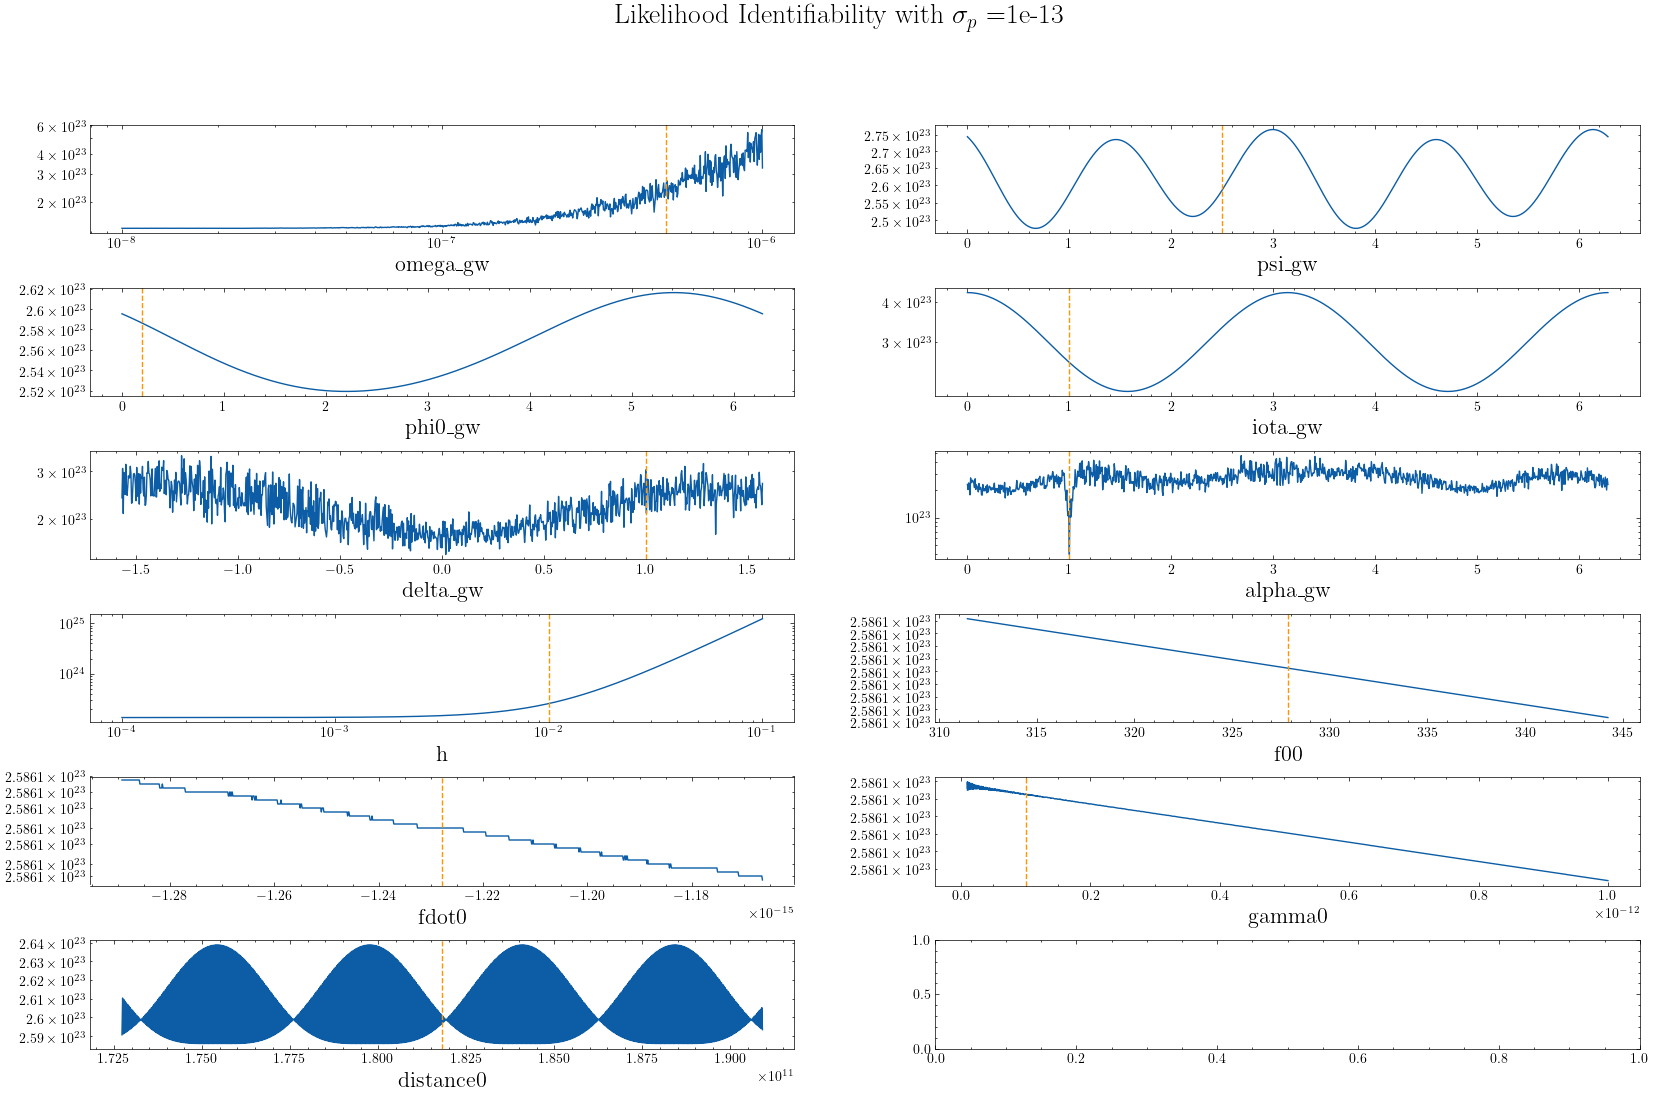

In [453]:
from plotting import likelihoods_over_priors
import numpy as np 


P   = SystemParameters()   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Optimal likelihood is: ", model_likelihood)



selected_parameters = ["omega_gw","psi_gw","phi0_gw","iota_gw","delta_gw","alpha_gw","h","f00","fdot0","gamma0","distance0"]
parameters_dict = {k: true_parameters[k] for k in selected_parameters}


nsamples = int(1e3)
priors = [np.logspace(-8,-6,nsamples),    #omega
          np.linspace(0,2*np.pi,nsamples),#psi
          np.linspace(0,2*np.pi,nsamples),#phi0
          np.linspace(0,2*np.pi,nsamples), #iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),        #delta
          np.linspace(0,2*np.pi,nsamples),#alpha
          np.logspace(-4,-1,nsamples), #h
          np.linspace(true_parameters["f00"]*0.95,true_parameters["f00"]*1.05, nsamples), #f0
          np.linspace(true_parameters["fdot0"]*1.05,true_parameters["fdot0"]*0.95, nsamples), #fdot0
          np.logspace(-12,-14,nsamples), #gamma0
          np.linspace(true_parameters["distance0"]*0.95,true_parameters["distance0"]*1.05, nsamples), #distance0
]


likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=P["sigma_p"])




### 4.2 Heatmaps

We can see some issues for some of the parameters, even if we know the true value of all the other parameters.

It is also of interest to explore the Likelihood space in higher dimensions.

For instance, what if we know the true value of all the parameters except $\omega$ and $\delta$?



In [1]:
import numpy as np
def likelihood_surface(param_name_1, param_name_2, range_1,range_2,savefile):

    #Setup
    P    = SystemParameters()       #define the system parameters as a class
    PTA  = Pulsars(P)               #setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    #Define the model 
    model = LinearModel

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)


    #Iterate
    #deltas = np.linspace(-np.pi/2,np.pi/2,200)
    #omegas = np.logspace(-9,-6,200)
    likelihoods = np.zeros((len(range_1),len(range_2)))

    for i in range(len(range_1)):
        for j in range(len(range_2)):

            p1 = range_1[i]
            p2 = range_2[j]

            true_parameters = priors_dict(PTA,P)
            true_parameters[param_name_1] = p1
            true_parameters[param_name_2] = p2


            model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
            
            likelihoods[i,j] = model_likelihood

            #print(p1,p2,model_likelihood)



    d = {}
    d[param_name_1] = range_1
    d[param_name_2] = range_2
    d['likelihood'] = likelihoods

    np.savez(savefile,**d)




In [6]:

param_1 = "psi_gw"
param_2 = "phi0_gw"

range_1 = np.arange(0,2*np.pi,0.10)
range_2 = np.arange(0,2*np.pi,0.10)


savefile = f"../data/{param_1}_{param_2}_surface_data2"

likelihood_surface(param_1, param_2, range_1,range_2,savefile)



